<a href="https://colab.research.google.com/github/arsalanmontazeri/Arsalan-Montazeri/blob/waze/waze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For displaying all of the columns in dataframes
pd.set_option('display.max_column',None)
# For data modeling
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
# For saving models
import pickle

In [ ]:
waze=pd.read_csv('waze_dataset.csv')

In [ ]:
waze.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [ ]:
waze.shape

(14999, 13)

In [ ]:
waze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [ ]:
df=waze.drop('ID',axis=1)
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [ ]:
df.isna().sum()
df_na=df[df['label'].isna()]
df_na.shape

(700, 12)

In [ ]:
data=df[~df['label'].isna()]
data.shape

(14299, 12)

In [ ]:
data.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


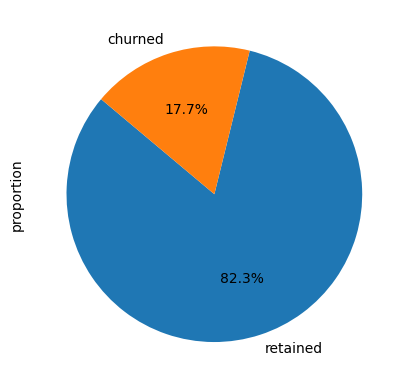

In [ ]:
label=data['label'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',startangle=140)

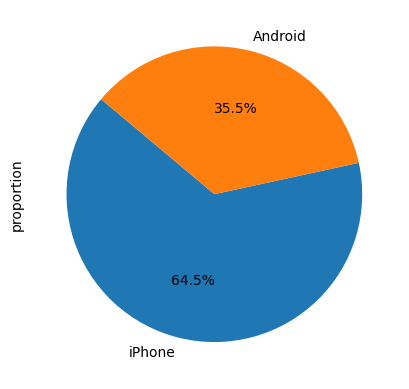

In [ ]:
device=data['device'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',startangle=140)

In [ ]:
data.groupby('label')['device'].value_counts(normalize=True)

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: proportion, dtype: float64

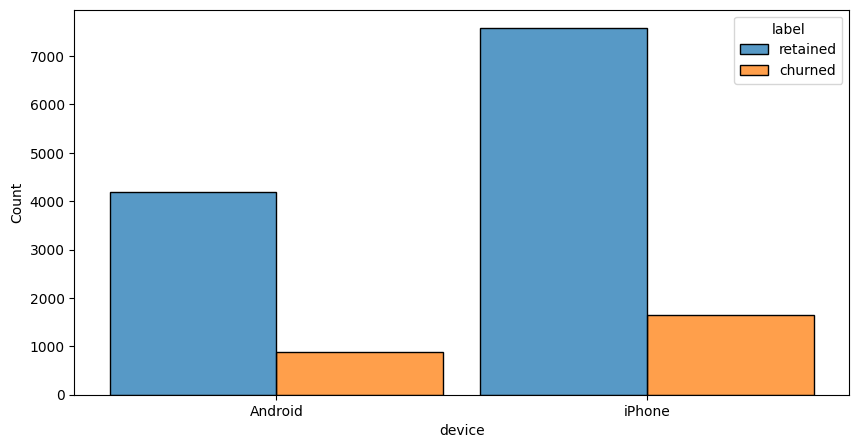

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=data,x='device',hue='label',multiple='dodge',shrink=.9)
plt.show()

In [ ]:
df.groupby(['label']).median(numeric_only=True)

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,
churned,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


In [ ]:
data['km_per_drive']= data['driven_km_drives']/ data['drives']
data.head()
data.groupby('label')['km_per_drive'].median()

<ipython-input-15-f730a95232c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['km_per_drive']= data['driven_km_drives']/ data['drives']


,km_per_drive
label,
churned,74.109416
retained,75.014702


In [ ]:
data['km_per_driving_days']=data['driven_km_drives'] / data['driving_days']
data.groupby('label')['km_per_driving_days'].median()

<ipython-input-16-14ff8e078edd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['km_per_driving_days']=data['driven_km_drives'] / data['driving_days']


,km_per_driving_days
label,
churned,697.541999
retained,289.549333


In [ ]:
data['drives_per_driving_day'] = data['drives'] / data['driving_days']
data.groupby('label')[['drives_per_driving_day']].median()

<ipython-input-17-9c5d99404f14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['drives_per_driving_day'] = data['drives'] / data['driving_days']


,drives_per_driving_day
label,
churned,10.0000
retained,4.0625


In [ ]:
data.drop(columns=['km_per_drive','drives_per_driving_day'],inplace=True)

<ipython-input-18-79b0d82fc6d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['km_per_drive','drives_per_driving_day'],inplace=True)


In [ ]:
from scipy import stats
z_scores = stats.zscore(data['driving_days'])
outliers = data[abs(z_scores) > 3]
outliers

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_days


In [ ]:
from scipy import stats
z_scores = stats.zscore(data['drives'])
outliers = data[abs(z_scores) > 3]
outliers

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_days
127,retained,402,322,510.953267,496,0,132,5781.057241,515.215266,24,21,iPhone,275.288440
210,churned,351,281,453.639421,3362,0,0,1812.494756,665.272991,9,8,Android,226.561845
305,retained,333,268,340.379491,1071,63,0,1404.494019,478.730200,19,13,iPhone,108.038001
396,retained,370,299,425.852246,1321,75,0,3302.956419,200.249950,25,18,iPhone,183.497579
419,churned,476,381,572.453053,380,118,0,6137.570245,2315.331183,4,4,Android,1534.392561
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14819,churned,337,270,470.133004,750,200,0,3445.891419,2389.647975,7,2,Android,1722.945710
14839,retained,378,303,385.215242,505,14,0,2573.125383,783.580762,24,16,iPhone,160.820336
14874,churned,539,433,551.295691,572,106,0,10999.843300,5082.229891,15,10,Android,1099.984330
14889,retained,341,273,388.644402,2457,107,0,1970.898561,1109.239785,28,18,iPhone,109.494365


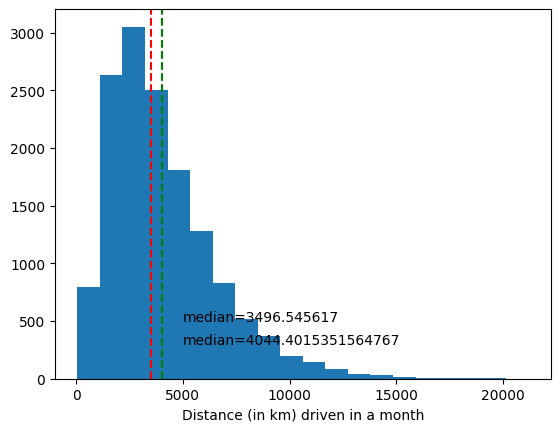

In [ ]:
plt.hist(data['driven_km_drives'],bins=20)
plt.xlabel('Distance (in km) driven in a month')
median=data['driven_km_drives'].median()
mean=data['driven_km_drives'].mean()
plt.axvline(median,color='r',linestyle='--',label='median')
plt.axvline(mean,color='g',linestyle='--',label='mean')
plt.text(5000,300, 'median='+str(mean), color='black')
plt.text(5000,500, 'median='+str(median), color='black')
plt.show()

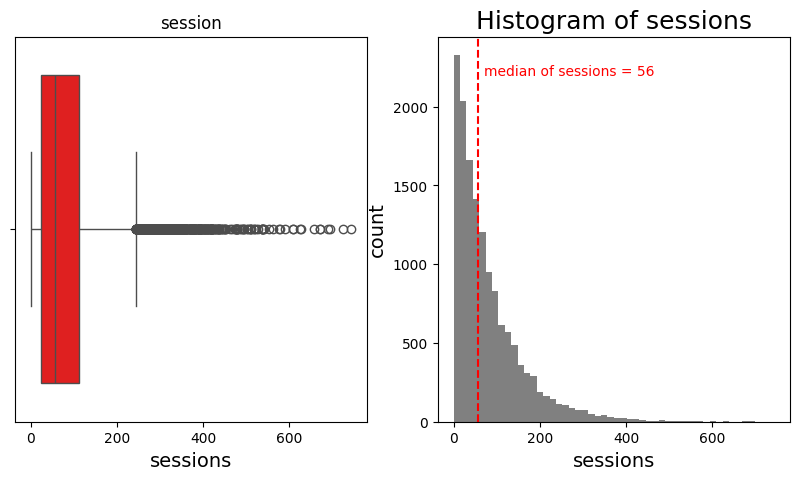

In [ ]:
#(Sessions. Number of occurrences of a user opening the app during the month.)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1=sns.boxplot(data=data,x='sessions',color='r',ax=ax1)
ax1.set_title('session')
ax1.set_xlabel("sessions",fontsize=14)
median_sessions = np.median(data['sessions'])
ax2 = plt.hist(data['sessions'],bins=50,color='grey')
plt.axvline(median_sessions,color="red",ls="--",label="Median hour")
plt.xlabel('sessions',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.text(70,2200,'median of sessions = 56',color='red')
plt.title('Histogram of sessions',fontsize=18);

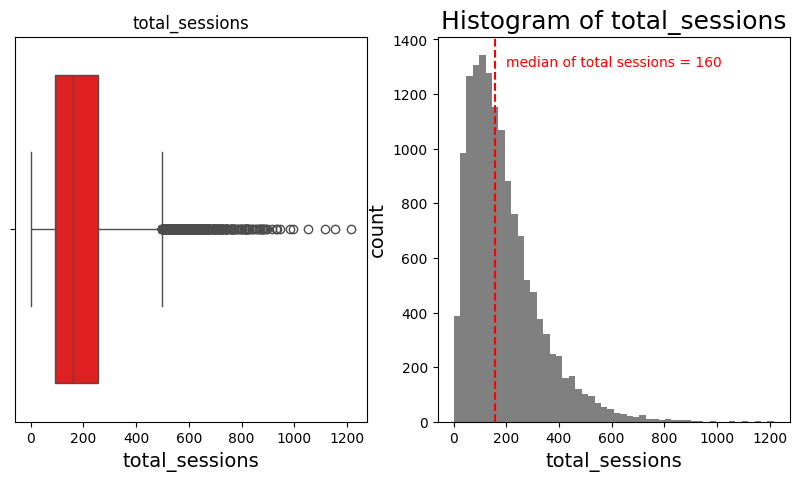

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1=sns.boxplot(data=data,x='total_sessions',color='r',ax=ax1)
ax1.set_title('total_sessions')
ax1.set_xlabel("total_sessions",fontsize=14)

median_session = np.median(data['total_sessions'])
ax2 = plt.hist(data['total_sessions'],bins=50,color='grey')
plt.axvline(median_session,color="red",ls="--",label="Median hour")
plt.xlabel('total_sessions',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.text(200,1300,'median of total sessions = 160',color='red')
plt.title('Histogram of total_sessions',fontsize=18);

<ipython-input-24-4e54f961c4a7>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(),size=14)


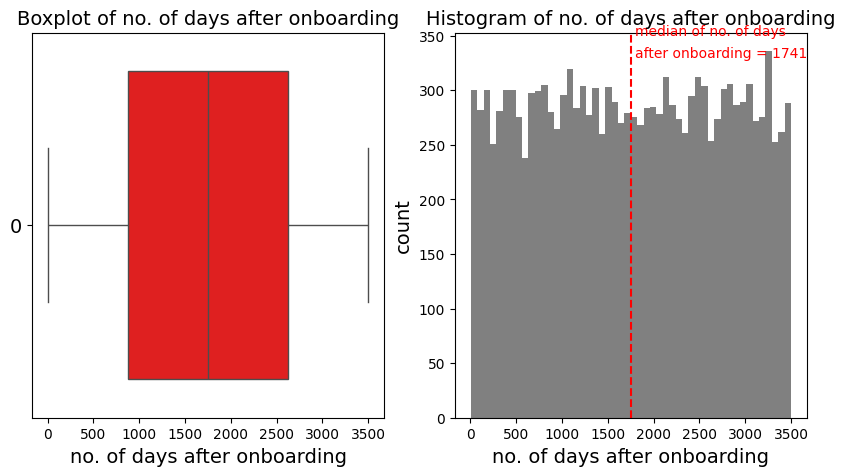

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1=sns.boxplot(data=data,x='n_days_after_onboarding',color='r',ax=ax1)
ax1.set_xlabel("no. of days after onboarding",fontsize=14)
ax1.set_title('Boxplot of no. of days after onboarding',fontsize=14)
ax1.set_yticklabels(ax1.get_yticks(),size=14)

median=np.median(data['n_days_after_onboarding'])
ax2=plt.hist(data=data,x='n_days_after_onboarding',bins=50,color='gray')
plt.axvline(median,color="red",ls="--",label="Median hour")
plt.xlabel('no. of days after onboarding',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.text(1800,350,'median of no. of days',color='red')
plt.text(1800,330,'after onboarding = 1741',color='red')
plt.title('Histogram of no. of days after onboarding',fontsize=14);

<ipython-input-25-7584e248bbeb>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(),size=14)


Text(0.5, 1.0, 'Histogram of duration in the month')

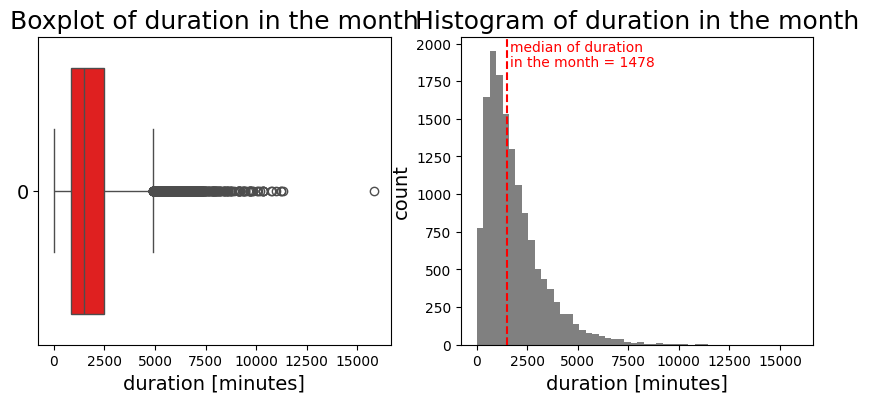

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))

ax1 = sns.boxplot(data=data,x='duration_minutes_drives',color='r',ax=ax1)
ax1.set_xlabel("duration [minutes]",fontsize=14)
ax1.set_title('Boxplot of duration in the month',fontsize=18)
ax1.set_yticklabels(ax1.get_yticks(),size=14)

median_durmins = np.median(data['duration_minutes_drives'])
ax2 = plt.hist(data['duration_minutes_drives'],bins=50,color='grey')
plt.axvline(median_durmins,color="red",ls="--",label="Median hour")
plt.xlabel('duration [minutes]',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.text(1650,1950,'median of duration',color='red')
plt.text(1650,1850,'in the month = 1478',color='red')
plt.title('Histogram of duration in the month',fontsize=18)

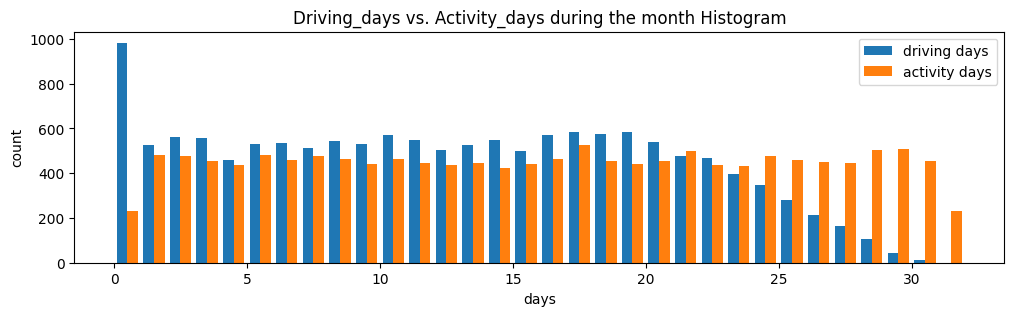

In [ ]:
plt.figure(figsize=(12,3));
labels =['driving days', 'activity days']
plt.hist([data['driving_days'],data['activity_days']],bins=range(0,33),label=labels)
plt.title('Driving_days vs. Activity_days during the month Histogram')
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.show()

In [ ]:
data['km_per_driving_days'].describe()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,km_per_driving_days
count,1.429900e+04
mean,inf
std,NaN
min,3.022063e+00
25%,1.675616e+02
50%,3.241789e+02
75%,7.608293e+02
max,inf


In [ ]:
data.loc[data['km_per_driving_days']==np.inf,'km_per_driving_days']=0
data['km_per_driving_days'].describe()

,km_per_driving_days
count,14299.000000
mean,581.942399
std,1038.254509
min,0.000000
25%,136.168003
50%,273.301012
75%,558.018761
max,15420.234110


<Axes: xlabel='km_per_driving_days', ylabel='Count'>

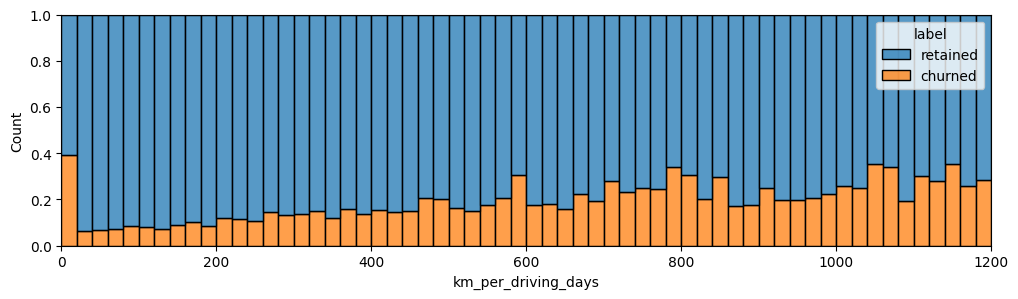

In [ ]:
plt.figure(figsize=(12,3))
sns.histplot(data=data,x='km_per_driving_days',bins=range(0,1201,20),hue='label',multiple='fill')

<Axes: xlabel='driving_days', ylabel='Count'>

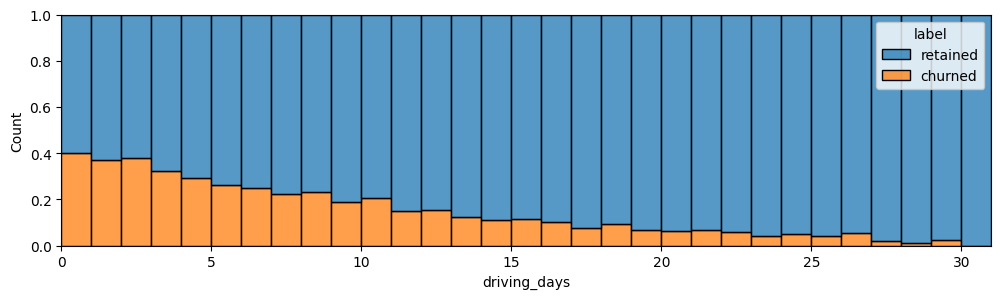

In [ ]:
plt.figure(figsize=(12,3))
sns.histplot(data=data,x='driving_days',bins=range(0,32),hue='label',multiple='fill')

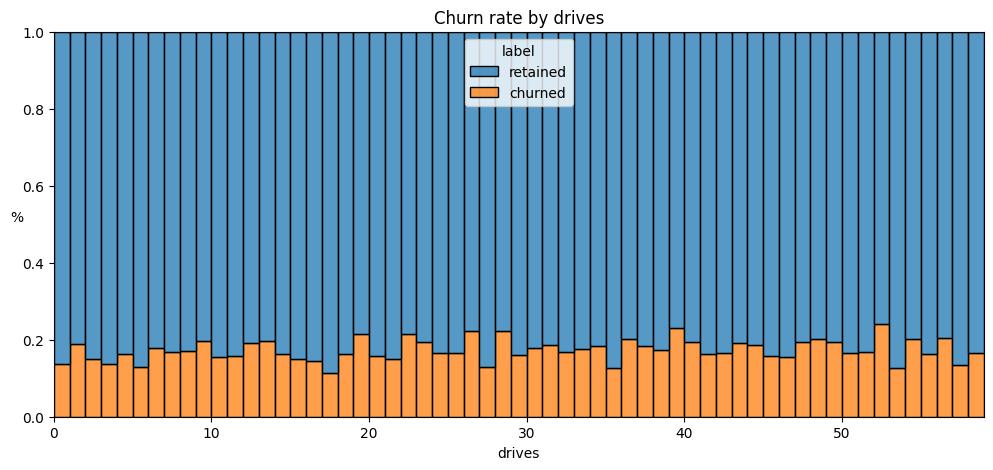

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(data=data,
             x='drives',
             bins=range(0, 60),
             #bins=range(0, 600, 10),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by drives');

In [ ]:
data['percent_session_last_month']=data['sessions'] / data['total_sessions']

<ipython-input-34-0eec20860c3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['percent_session_last_month']=data['sessions'] / data['total_sessions']


In [ ]:
median_sess=data['percent_session_last_month'].median()

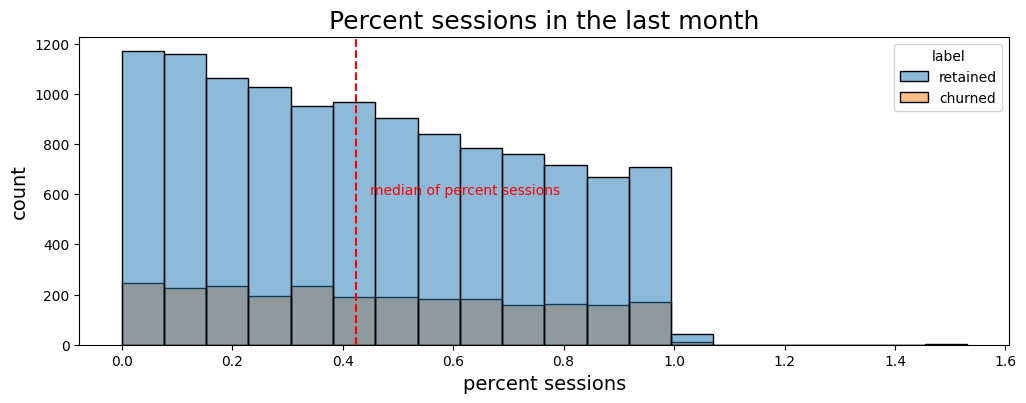

In [ ]:
plt.figure(figsize=(12,4))

sns.histplot(data=data,x='percent_session_last_month',bins=20,hue='label')
plt.axvline(median_sess,color='r',linestyle='--')
plt.text(.45,600,'median of percent sessions',color='red')
plt.xlabel('percent sessions',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.title('Percent sessions in the last month',fontsize=18);

In [ ]:
data['n_days_after_onboarding'].median()

1749.0

Text(0.5, 1.0, '(only people with a least 40% of their total sessions in the last month)')

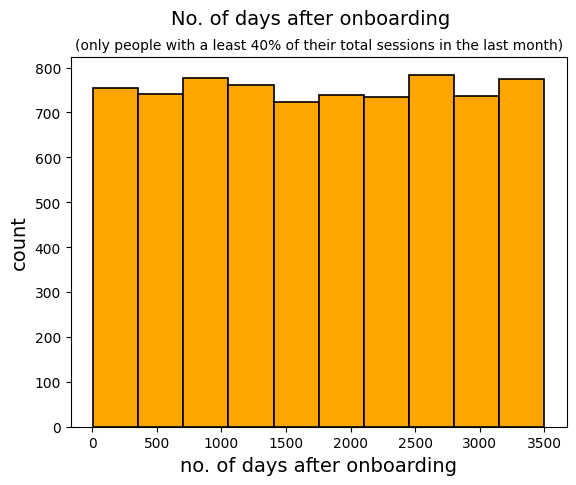

In [ ]:
data40 = data[data['percent_session_last_month']>=0.4]

plt.hist(data40['n_days_after_onboarding'],color='orange',edgecolor='black',linewidth=1.2)
plt.xlabel('no. of days after onboarding',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.suptitle('No. of days after onboarding',fontsize=14);
plt.title('(only people with a least 40% of their total sessions in the last month)',fontsize=10)

In [ ]:
data['professional_drivers']=np.where((data['drives']>=60)&(data['driving_days']>=15),1,0)

<ipython-input-47-301c97a0cca1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['professional_drivers']=np.where((data['drives']>=60)&(data['driving_days']>=15),1,0)


In [ ]:
data['professional_drivers'].value_counts()

,count
professional_drivers,
0,11811
1,2488


In [ ]:
data.groupby('label')['professional_drivers'].value_counts(normalize=True)

label     professional_drivers
churned   0                       0.925868
          1                       0.074132
retained  0                       0.804472
          1                       0.195528
Name: proportion, dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder
Label_encoder=LabelEncoder()
df=data.copy()
df['device']=Label_encoder.fit_transform(df['device'])


In [ ]:
df['device'].value_counts()

,count
device,
1,9225
0,5074


In [ ]:
df['label']=Label_encoder.fit_transform(df['label'])

In [ ]:
df['label'].value_counts()

,count
label,
1,11763
0,2536


In [ ]:
data['label'].value_counts()

,count
label,
retained,11763
churned,2536
